# Códigos que uso para hacer la actividad 3

In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import Curves2D
import plotly.graph_objects as go
import pandas as pd

In [2]:
data_folder='/home/ramiro/Facultad/Tesis/Datos/Datos_tesis/'
snap_list=[28,19,15,12]
redshift_list=[0,1,2,3]
simu='RefL0100N1504'
plt.rc('text', usetex=False)


color=['k','b','g','r']    
line=['-','--','-.',':']   

In [3]:
DF = pd.read_csv('/home/ramiro/Facultad/Tesis/Datos/Datos_tesis/datos_tesis_RefL0100N1504_snap_12_aprture_ninguna.dat')

In [4]:
DF['SubGroupNumber'].value_counts()

0    520
1     54
2     12
3      7
4      2
8      1
Name: SubGroupNumber, dtype: int64

In [5]:
len(DF)

596

In [6]:
# Parmetros para determinar la curva mediana y errores
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=15         # Mínima cantidad de elementos para considerar en un bin

## 1) Testear las siguientes relaciones de escala (mediana + percentiles 25th y 75th) superponiendo en el mismo gráfico z=0,1,2,3:

## 12+log10(O/H) vs log10(Mstar) para la componente star forming

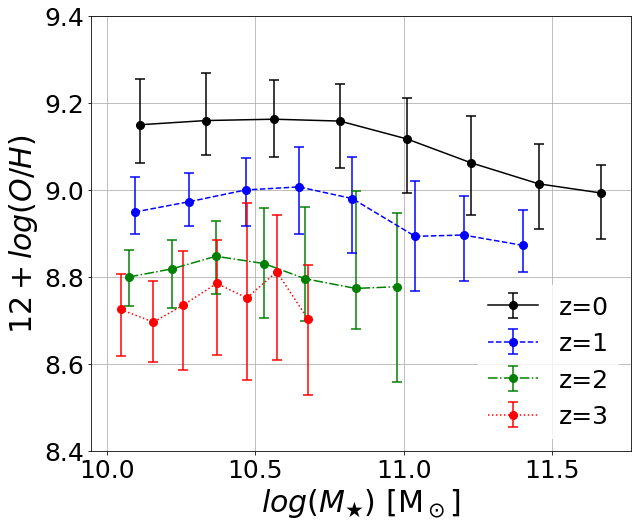

In [7]:
fig,ax=plt.subplots(figsize=(10,8))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)

for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='datos_tesis_'+simu+'_snap_'+str(snap)+'_aprture_ninguna.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    table['sSFR']=table['StarFormationRate']/table['Stars_Mass']
    
    SF_O  = table['SF_Oxygen'][mask]
    SF_H  = table['SF_Hydrogen'][mask]
    SF_M  = table['SF_Mass'][mask]
    M_Star= table['Stars_Mass'][mask]

    M_O_SF = SF_O*SF_M
    M_H_SF = SF_H*SF_M

    xvar   = np.log10(M_Star)
    yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

#     ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    ax.errorbar(xmedian,ymedian,yerr=yerror,c=lc,marker='o',markersize=8,linestyle=ls,linewidth=1.5,label='z='+str(redshift),capsize=5,capthick=1.5)
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


xlim=(min(XMED_m)-0.1,max(XMED_M)+0.1)
ylim=(min(YMED_m)-0.5,max(YMED_M)+0.5)

ylim = (8.4,9.4)

xlabel=r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel=r'$12+log(O/H)$'

ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

ax.tick_params(axis='both',labelsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

leg = plt.legend(loc='lower right',edgecolor='w',fontsize=25)
# leg.set_title('EAGLE RefL0100N1504', prop = {'size':14})

# Ajustamos los margenes
plt.subplots_adjust(left=0.15)

plt.grid(True)
# plt.savefig('log10(O_H)_vs_log10(Mstar)_(z=0,1,2,3)_con_percentiles.pdf')
plt.show()

## $K_{Co}~VS~log(M_{\bigstar})$

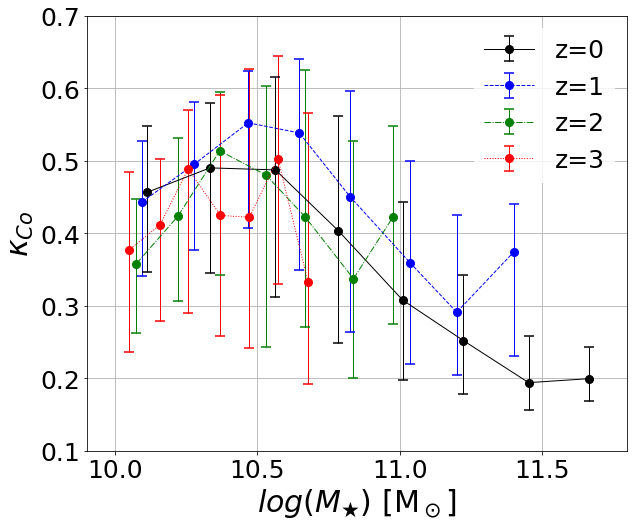

In [8]:
fig,ax=plt.subplots(figsize=(10,8))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)


for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='datos_tesis_'+simu+'_snap_'+str(snap)+'_aprture_ninguna.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    table['sSFR']=table['StarFormationRate']/table['Stars_Mass']

    M_Star = table['Stars_Mass'][mask]
    K_Co   = table['KappaCoRot'][mask]
    
    xvar   = np.log10(M_Star)
    yvar   = K_Co
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

#     ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    ax.errorbar(xmedian,ymedian,yerr=yerror,c=lc,marker='o',markersize=8,linestyle=ls,linewidth=1,label='z='+str(redshift),capsize=5,capthick=1.5)
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


# xlim=(min(XMED_m),max(XMED_M))
# ylim=(min(YMED_m),max(YMED_M))

xlim = (9.9,11.8)
ylim = (0.1,0.7)

xlabel=r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel=r'$\kappa_{Co}$'

ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

ax.tick_params(axis='both',labelsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=25)
# leg.set_title('EAGLE RefL0100N1504', prop = {'size':14})

# Ajustamos los margenes
plt.subplots_adjust(left=0.15)

plt.grid(True)
# plt.savefig('Krot_vs_log10(Mstar)_(z=0,1,2,3)_con_percentiles.pdf')
plt.show()

## $log(sSFR)~VS~log(M_{\bigstar})$

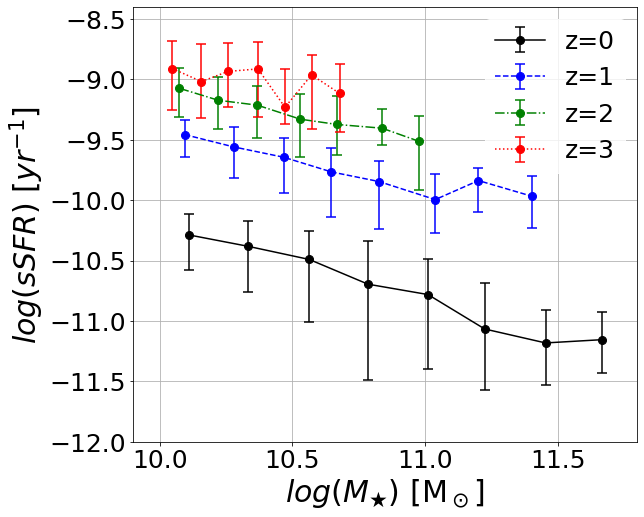

In [9]:
fig,ax=plt.subplots(figsize=(10,8))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)


for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='datos_tesis_'+simu+'_snap_'+str(snap)+'_aprture_ninguna.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    table['sSFR']=table['StarFormationRate']/table['Stars_Mass']
    
    M_Star = table['Stars_Mass'][mask]
    sSFR   = table['sSFR'][mask]

    xvar   = np.log10(M_Star)
    yvar   = np.log10(sSFR)
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

#     ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    ax.errorbar(xmedian,ymedian,yerr=yerror,c=lc,marker='o',markersize=8,linestyle=ls,linewidth=1.5,label='z='+str(redshift),capsize=5,capthick=1.5)
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


# xlim=(min(XMED_m)-0.1,max(XMED_M)+0.1)
# ylim=(min(YMED_m)-0.5,max(YMED_M)+0.5)

xlim = (9.9,11.8)
ylim = (-12,-8.4)


xlabel=r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel=r'$log(sSFR)~[yr^{-1}]$'

ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

ax.tick_params(axis='both',labelsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=25)
# leg.set_title('EAGLE RefL0100N1504', prop = {'size':14})

# Ajustamos los margenes
plt.subplots_adjust(left=0.2)

plt.grid(True)
# plt.savefig('log10(sSFR)_vs_log10(Mstar)_(z=0,1,2,3)_con_percentiles.pdf')
plt.show()

## $log(M_{200})~VS~log(M_{\bigstar})$

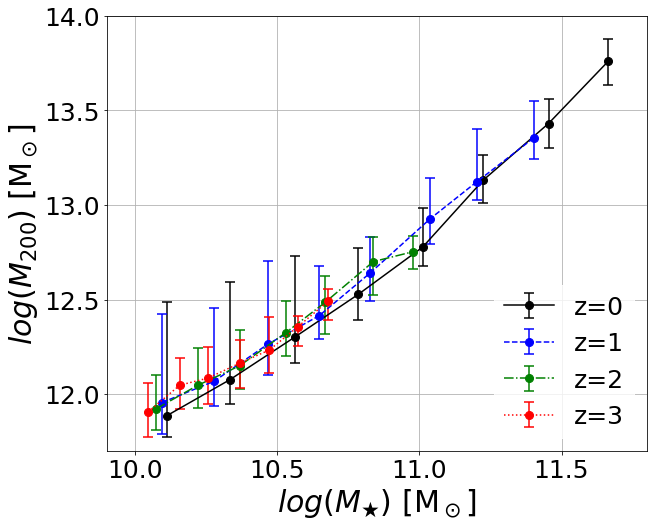

In [10]:
fig,ax=plt.subplots(figsize=(10,8))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)



for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='datos_tesis_'+simu+'_snap_'+str(snap)+'_aprture_ninguna.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    
    M_Star = table['Stars_Mass'][mask]
    M_200  = table['Group_M_Crit200'][mask]

    xvar   = np.log10(M_Star)
    yvar   = np.log10(M_200)
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

#     ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    ax.errorbar(xmedian,ymedian,yerr=yerror,c=lc,marker='o',markersize=8,linestyle=ls,linewidth=1.5,label='z='+str(redshift),capsize=5,capthick=1.5)
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


# xlim=(min(XMED_m)-0.1,max(XMED_M)+0.1)
# ylim=(min(YMED_m)-0.5,max(YMED_M)+0.5)

xlim = (9.9,11.8)
ylim = (11.7,14)

xlabel=r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel=r'$log(M_{200})~[\rm{M}_\odot]$'

ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

ax.tick_params(axis='both',labelsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

leg = plt.legend(loc='lower right',edgecolor='w',fontsize=25)
# leg.set_title('EAGLE RefL0100N1504', prop = {'size':14})

# Ajustamos los margenes
plt.subplots_adjust(left=0.15)

plt.grid(True)
# plt.savefig('log10(M_200)_vs_log10(Mstar)_(z=0,1,2,3)_con_percentiles.pdf')
plt.show()

## $F_{SFgas}~VS~log(M_{\bigstar})$

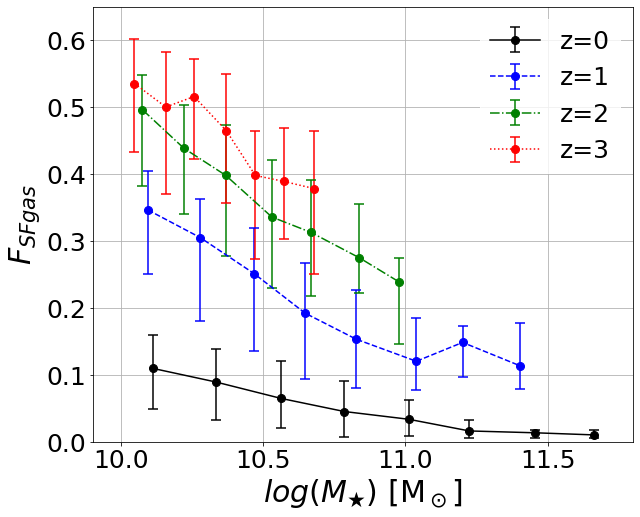

In [11]:
fig,ax=plt.subplots(figsize=(10,8))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)



for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='datos_tesis_'+simu+'_snap_'+str(snap)+'_aprture_ninguna.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    table['sSFR']=table['StarFormationRate']/table['Stars_Mass']
    
    M_Star = table['Stars_Mass'][mask]
    Fg     = table['SF_Mass'][mask]/(table['Stars_Mass'][mask]+table['SF_Mass'][mask])

    xvar   = np.log10(M_Star)
    yvar   = Fg
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

#     ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    ax.errorbar(xmedian,ymedian,yerr=yerror,c=lc,marker='o',markersize=8,linestyle=ls,linewidth=1.5,label='z='+str(redshift),capsize=5,capthick=1.5)
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


# xlim=(min(XMED_m)-0.1,max(XMED_M)+0.1)
# ylim=(min(YMED_m)-0.5,max(YMED_M)+0.5)

xlim = (9.9,11.8)
ylim = (0,0.65)

xlabel=r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel=r'$F_{SFgas}$'

ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

ax.tick_params(axis='both',labelsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=25)
# leg.set_title('EAGLE RefL0100N1504', prop = {'size':14})

# Ajustamos los margenes
plt.subplots_adjust(left=0.15)

plt.grid(True)
# plt.savefig('Fgas_vs_log10(Mstar)_(z=0,1,2,3)_con_percentiles.pdf')
plt.show()

## $log(M_{BH}/M_{\bigstar})~VS~log(M_{\bigstar})$

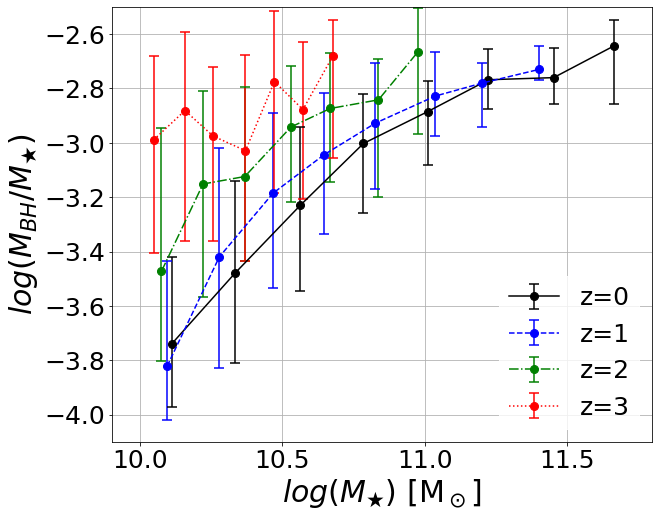

In [14]:
fig,ax=plt.subplots(figsize=(10,8))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)



for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='datos_tesis_'+simu+'_snap_'+str(snap)+'_aprture_ninguna.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)&(table['BlackHoleMass']>0)
    table['sSFR']=table['StarFormationRate']/table['Stars_Mass']
    
    M_Star= table['Stars_Mass'][mask]
    M_BH  = table['BlackHoleMass'][mask]


    xvar   = np.log10(M_Star)
    yvar   = np.log10(M_BH/M_Star)
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

#     ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    ax.errorbar(xmedian,ymedian,yerr=yerror,c=lc,marker='o',markersize=8,linestyle=ls,linewidth=1.5,label='z='+str(redshift),capsize=5,capthick=1.5)
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


# xlim=(min(XMED_m)-0.1,max(XMED_M)+0.1)
# ylim=(min(YMED_m)-0.5,max(YMED_M)+0.5)

xlim = (9.9,11.8)
ylim = (-4.1,-2.5)

xlabel=r'$log(M_\bigstar) \ [\rm{M}_\odot]$'
ylabel=r'$log(M_{BH}/M_{\bigstar})$'

ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

ax.tick_params(axis='both',labelsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

leg = plt.legend(loc='lower right',edgecolor='w',fontsize=25)
# leg.set_title('EAGLE RefL0100N1504', prop = {'size':14})

# Ajustamos los margenes
plt.subplots_adjust(left=0.15)

plt.grid(True)
# plt.savefig('log10(MBH_Mstar)_vs_log10(Mstar)_(z=0,1,2,3)_con_percentiles.pdf')
# plt.show()

# -------------------------------------------------------------------------------------------------------------------------------------------

*log10(SFR) vs log10(Mstar)*

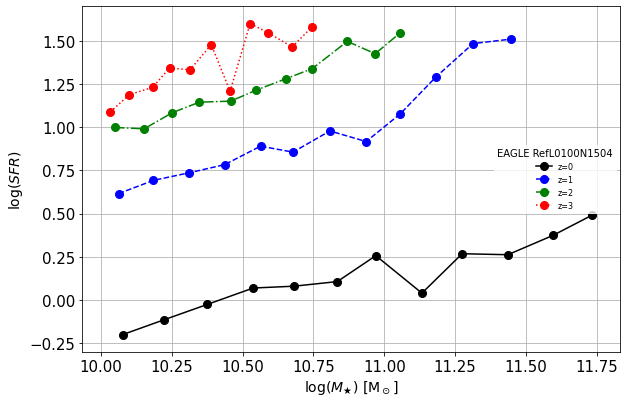

In [7]:
fig,ax=plt.subplots(figsize=(9,6))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)


for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='galaxias_'+simu+'_snap_'+str(snap)+'.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)&(table['StarFormationRate']>0)

    M_Star= table['Stars_Mass'][mask]
    SFR   = table['StarFormationRate'][mask]

    xvar   = np.log10(M_Star)
    yvar   = np.log10(SFR)
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)
    
    ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


xlim=(min(XMED_m)-0.1,max(XMED_M)+0.1)
ylim=(min(YMED_m)-0.1,max(YMED_M)+0.1)

xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'
ylabel=r'$\log(SFR)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='right',edgecolor='w',fontsize=8)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':10})

plt.grid(True)
# plt.rc('text', usetex=True)

# plt.savefig('log10(SFR)_vs_log10(Mstar)_(z=0,1,2,3).png')
plt.show()

*log10(sSFR) vs log10(Mstar)*

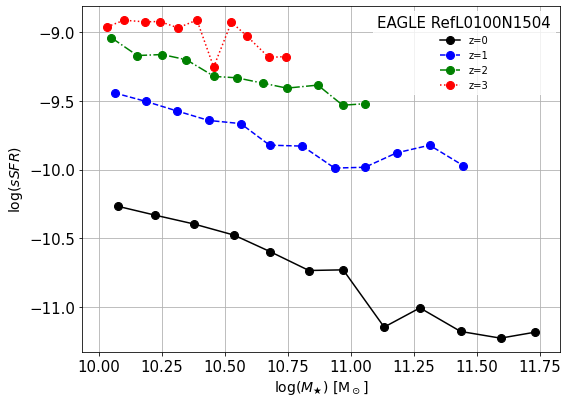

In [8]:
fig,ax=plt.subplots(figsize=(8,6))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)


for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='galaxias_'+simu+'_snap_'+str(snap)+'.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)&(table['StarFormationRate']>0)
    table['sSFR']=table['StarFormationRate']/table['Stars_Mass']
    
    sSFR = table['sSFR'][mask]
    M_Star= table['Stars_Mass'][mask]

    xvar   = np.log10(M_Star)
    yvar   = np.log10(sSFR)
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)
    
    ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


xlim=(min(XMED_m)-0.1,max(XMED_M)+0.1)
ylim=(min(YMED_m)-0.1,max(YMED_M)+0.1)

xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'
ylabel=r'$\log(sSFR)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})

plt.grid(True)
plt.savefig('log10(sSFR)_vs_log10(Mstar)_(z=0,1,2,3).png')
plt.show()

*Mgas/(Mgas+MStar) vs log10(MStar)*

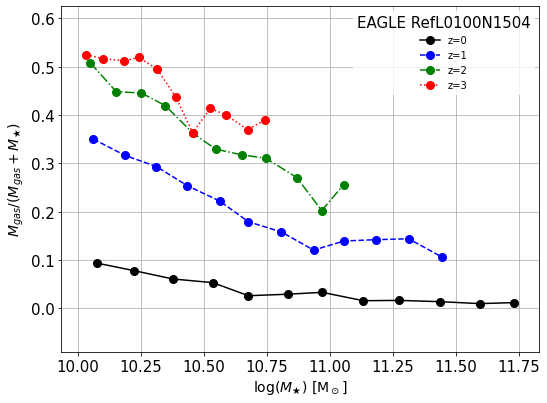

In [9]:
fig,ax=plt.subplots(figsize=(8,6))
XMED_m = np.ones_like(redshift_list,float)
XMED_M = np.ones_like(redshift_list,float)
YMED_m = np.ones_like(redshift_list,float)
YMED_M = np.ones_like(redshift_list,float)


for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='galaxias_'+simu+'_snap_'+str(snap)+'.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 
         
    mask = (table['Stars_Mass']>=1e10)
    table['sSFR']=table['StarFormationRate']/table['Stars_Mass']
    
    M_Star  = table['Stars_Mass'][mask]
    M_SF_gas= table['SF_Mass'][mask]
        
    var1 = (M_SF_gas+M_Star)
    
    xvar   = np.log10(M_Star)
    yvar  = M_SF_gas/var1
    
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)
    
    ax.plot(xmedian,ymedian,marker='o',ms=8,linestyle=ls,color=lc,linewidth=1.5,label='z='+str(redshift))
    
    XMED_m[redshift] = min(xmedian)
    XMED_M[redshift] = max(xmedian)
    YMED_m[redshift] = min(ymedian)
    YMED_M[redshift] = max(ymedian)


xlim=(min(XMED_m)-0.1,max(XMED_M)+0.1)
ylim=(min(YMED_m)-0.1,max(YMED_M)+0.1)

xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'
ylabel=r'$M_{gas}/(M_{gas}+M_\bigstar)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})

plt.grid(True)
# plt.savefig('Mgas_(Mgas_MStar)_vs_log10(MStar)_(z=0,1,2,3).png')
plt.show()

**2) Realizar gráficos adicionales con los “scatter plots” de las relaciones anteriores sólo a z=0.**

*12+log10(O/H) vs log10(Mstar) para la componente star forming*

In [10]:
snap = 28
data_file='galaxias_'+simu+'_snap_'+str(snap)+'.dat'
data_path=data_folder+data_file
table=ascii.read(data_path,comment='#',format='fast_csv')

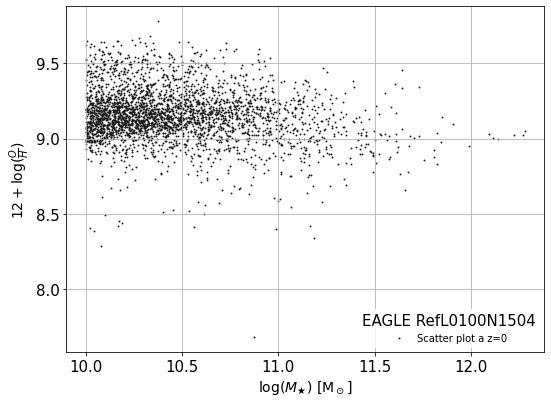

In [11]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['Stars_Mass']>=1e10)&(table['SF_Oxygen']>0)&(table['SF_Hydrogen']>0)&(table['SF_Mass']>0)
    
SF_O  = table['SF_Oxygen'][mask]
SF_H  = table['SF_Hydrogen'][mask]
SF_M  = table['SF_Mass'][mask]
M_Star= table['Stars_Mass'][mask]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

xvar   = np.log10(M_Star)
yvar   = 12 + np.log10(M_O_SF/(16*M_H_SF))

ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.1',label='Scatter plot a z=0')

xlim=(min(xvar)-0.1,max(xvar)+0.1)
ylim=(min(yvar)-0.1,max(yvar)+0.1)

xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'
ylabel=r'$12+\log(\frac{O}{H})$'


ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='lower right',edgecolor='w',fontsize=10)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})

plt.grid(True)
plt.savefig('scatter_log10(O_H)_vs_log10(Mstar)_(z=0).png')
plt.show()

*log10(SFR) vs log10(Mstar)*

In [12]:
snap = 28
data_file='galaxias_'+simu+'_snap_'+str(snap)+'.dat'
data_path=data_folder+data_file
table=ascii.read(data_path,comment='#',format='fast_csv')

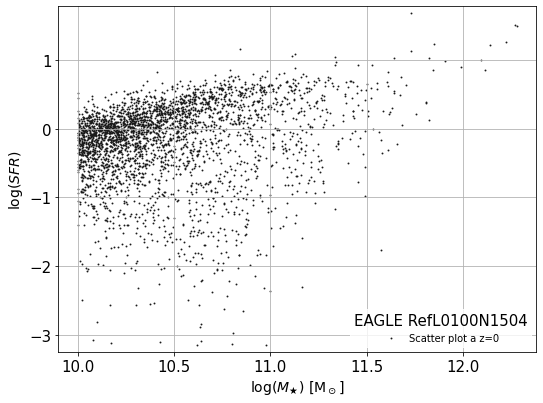

In [13]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['Stars_Mass']>=1e10)&(table['StarFormationRate']>0)

M_Star= table['Stars_Mass'][mask]
SFR   = table['StarFormationRate'][mask]

yvar   = np.log10(SFR)
xvar   = np.log10(M_Star)

ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.1',label='Scatter plot a z=0')

xlim=(min(xvar)-0.1,max(xvar)+0.1)
ylim=(min(yvar)-0.1,max(yvar)+0.1)

ylabel=r'$\log(SFR)$'
xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='lower right',edgecolor='w',fontsize=10)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})

plt.grid(True)
plt.savefig('scatter_log10(SFR)_vs_log10(Mstar)_(z=0).png')
plt.show()

*log10(sSFR) vs log10(Mstar)*

In [14]:
snap = 28
data_file='galaxias_'+simu+'_snap_'+str(snap)+'.dat'
data_path=data_folder+data_file
table=ascii.read(data_path,comment='#',format='fast_csv')

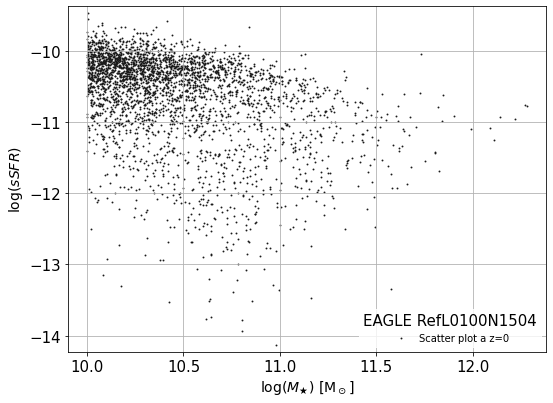

In [15]:
fig,ax=plt.subplots(figsize=(8,6))
         
mask = (table['Stars_Mass']>=1e10)&(table['StarFormationRate']>0)
table['sSFR']=table['StarFormationRate']/table['Stars_Mass']
    
sSFR  = table['sSFR'][mask]
M_Star= table['Stars_Mass'][mask]

xvar   = np.log10(M_Star)
yvar   = np.log10(sSFR)    

ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.1',label='Scatter plot a z=0')

ylim=(min(yvar)-0.1,max(yvar)+0.1)
xlim=(min(xvar)-0.1,max(xvar)+0.1)

ylabel=r'$\log(sSFR)$'
xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='lower right',edgecolor='w',fontsize=10)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})

plt.grid(True)
plt.savefig('scatter_log10(sSFR)_vs_log10(Mstar)_(z=0).png')
plt.show()

*Mgas/(Mgas+MStar) vs log10(MStar)*

In [16]:
snap = 28
data_file='galaxias_'+simu+'_snap_'+str(snap)+'.dat'
data_path=data_folder+data_file
table=ascii.read(data_path,comment='#',format='fast_csv')

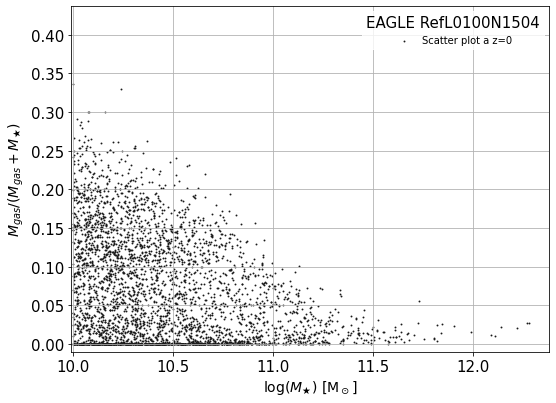

In [17]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['Stars_Mass']>=1e10)
table['sSFR']=table['StarFormationRate']/table['Stars_Mass']
    
M_Star  = table['Stars_Mass'][mask]
M_SF_gas= table['SF_Mass'][mask]
        
var1  = (M_SF_gas+M_Star)
    
yvar  = M_SF_gas/var1
xvar  = np.log10(M_Star)

ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.1',label='Scatter plot a z=0')

xlim=(min(xvar)-0.01,max(xvar)+0.1)
ylim=(min(yvar)-0.01,max(yvar)+0.1)

ylabel=r'$M_{gas}/(M_{gas}+M_\bigstar)$'
xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})

plt.grid(True)
plt.savefig('scatter_Mgas_(Mgas_MStar)_vs_log10(MStar)_(z=0).png')
plt.show()

**5) Realizar los siguientes “scatter plots” adicionales a z=0:**

*CentreOfPotential_y vs CentreOfPotential_x*

In [25]:
snap = 28
data_file='galaxias_'+simu+'_snap_'+str(snap)+'.dat'
data_path=data_folder+data_file
table=ascii.read(data_path,comment='#',format='fast_csv')

In [26]:
eje_1 = 'y'
eje_2 = 'x'
eje_3 = 'z'

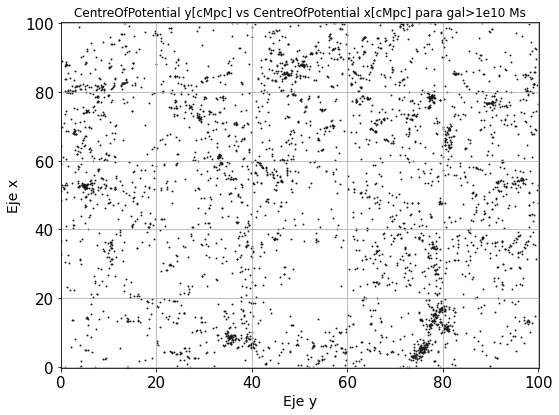

In [27]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['Stars_Mass']>=1e10)&(table['CentreOfPotential_'+eje_3]>0)

xvar= table['CentreOfPotential_'+eje_1][mask]
yvar= table['CentreOfPotential_'+eje_2][mask]

ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.1',label='Scatter plot a z=0')

xlim=(min(xvar)-0.01,max(xvar)+0.1)
ylim=(min(yvar)-0.1,max(yvar)+0.1)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc] para gal>1e10 Ms')

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

#leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})


plt.grid(True)
plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

*CentreOfPotential_z vs CentreOfPotential_x*

In [28]:
eje_1 = 'z'
eje_2 = 'x'
eje_3 = 'y'

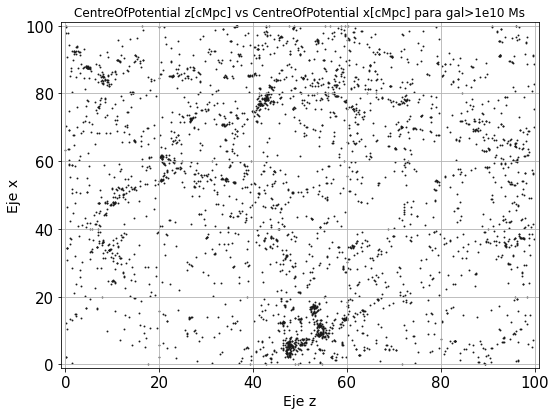

In [29]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['Stars_Mass']>=1e10)&(table['CentreOfPotential_'+eje_3]>10)

xvar= table['CentreOfPotential_'+eje_1][mask]
yvar= table['CentreOfPotential_'+eje_2][mask]

ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.1',label='Scatter plot a z=0')

xlim=(min(xvar)-1,max(xvar)+1)
ylim=(min(yvar)-1,max(yvar)+1)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc] para gal>1e10 Ms')

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

#leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})


plt.grid(True)
plt.savefig('CentreOfPotential_z_vs_CentreOfPotential_x_(z=0).png')
plt.show()

*CentreOfPotential_z vs CentreOfPotential_y*

In [30]:
eje_1 = 'z'
eje_2 = 'y'
eje_3 = 'x'

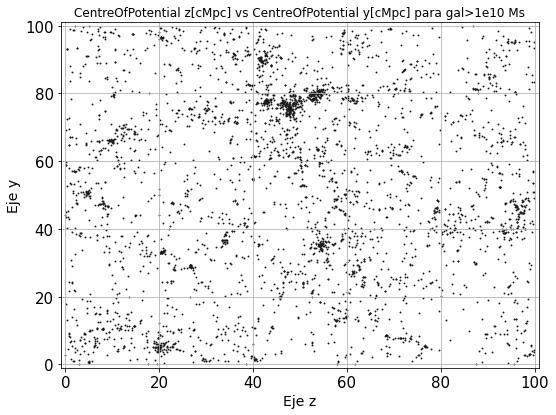

In [31]:
fig,ax=plt.subplots(figsize=(8,6))

mask = (table['Stars_Mass']>=1e10)&(table['CentreOfPotential_'+eje_3]>0)

xvar= table['CentreOfPotential_'+eje_1][mask]
yvar= table['CentreOfPotential_'+eje_2][mask]

ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.1',label='Scatter plot a z=0')

xlim=(min(xvar)-1,max(xvar)+1)
ylim=(min(yvar)-1,max(yvar)+1)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc] para gal>1e10 Ms')

plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

#leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})


plt.grid(True)
plt.savefig('CentreOfPotential_z_vs_CentreOfPotential_y_(z=0).png')
plt.show()

Intento hacer el último punto pero en una representación 3D

In [16]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

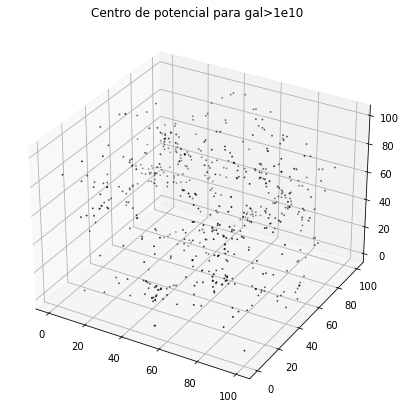

In [18]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

mask = (table['Stars_Mass']>=1e10)#&(table['CentreOfPotential_'+eje_3]>0)

xvar= table['CentreOfPotential_'+eje_1][mask]
yvar= table['CentreOfPotential_'+eje_2][mask]
zvar= table['CentreOfPotential_'+eje_3][mask]
 

ax.scatter3D(xvar, yvar, zvar,marker='o',s=0.8,c='0.1',label='Scatter plot a z=0')
plt.title("Centro de potencial para gal>1e10")

plt.savefig('CentreOfPotential_x_y_z_(z=0).png')
plt.show()

In [9]:
eje_1 = 'x'
eje_2 = 'y'
eje_3 = 'z'

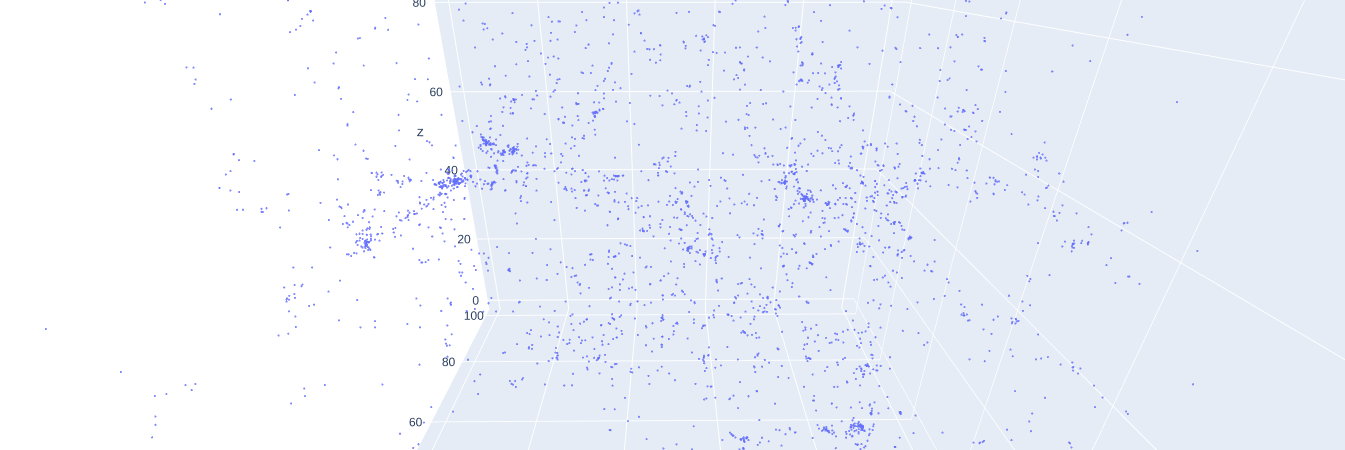

In [11]:
mask = (table['Stars_Mass']>=1e10)#&(table['CentreOfPotential_'+eje_3]>0)

xvar= table['CentreOfPotential_'+eje_1][mask]
yvar= table['CentreOfPotential_'+eje_2][mask]
zvar= table['CentreOfPotential_'+eje_3][mask]


fig = go.Figure(data=[go.Scatter3d(
    x=xvar,
    y=yvar,
    z=zvar,
    mode='markers',
    marker=dict(
        size=0.7,
        color=1,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
